In [1]:

from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical


In [2]:
# data load from keras
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

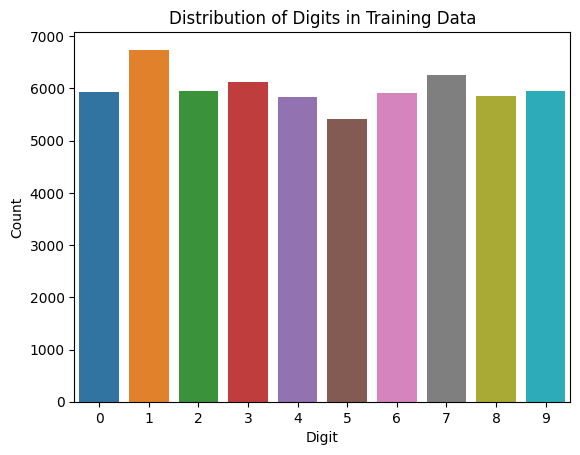

In [3]:
# plot
sns.countplot(x=mnist.load_data()[0][1])
plt.title("Distribution of Digits in Training Data")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

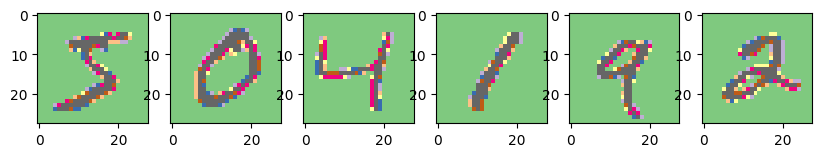

In [4]:

fig, axes = plt.subplots(1, 6, figsize=(10, 5))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i], cmap='Accent')
    ## ax.axis("off")
plt.show()

In [5]:
#light / 255  to make it from 0 to 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:

x_train = x_train.reshape(-1, 28, 28, 1) # added 1  to select color channls count
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [7]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 [==============================] - 21s 5ms/step - loss: 0.1244 - accuracy: 0.9619 - val_loss: 0.0456 - val_accuracy: 0.9859
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0411 - accuracy: 0.9872 - val_loss: 0.0410 - val_accuracy: 0.9862
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0277 - accuracy: 0.9912 - val_loss: 0.0250 - val_accuracy: 0.9917
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0193 - accuracy: 0.9938 - val_loss: 0.0299 - val_accuracy: 0.9899
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0163 - accuracy: 0.9946 - val_loss: 0.0302 - val_accuracy: 0.9901


313/313 [==============================] - 1s 2ms/step


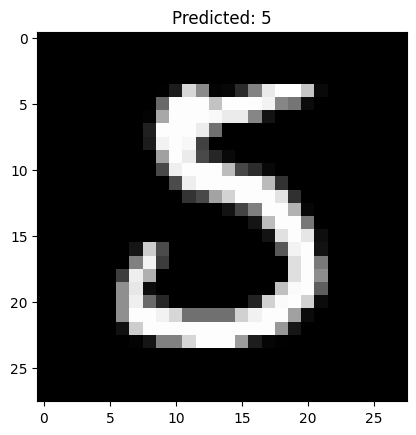

In [10]:
predictions = model.predict(x_test)
index = np.random.randint(0, len(x_test))
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[index])}")
plt.show()


In [ ]:
import cv2
import numpy as np


img = cv2.imread('ss.jpg', cv2.IMREAD_GRAYSCALE)


img = cv2.resize(img, (28, 28))


img = img / 255.0

img = 1 - img

img = img.reshape(1, 28, 28, 1)

prediction = model.predict(img)

print("Predicted digit:", np.argmax(prediction))
plt.imshow(img.reshape(28, 28), cmap='gray')


In [ ]:
model.save("digit_recognizer.h5")

c:\Users\mohamed\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
